In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.ticker import MaxNLocator
from scipy.stats import norm, linregress, binned_statistic
from scipy import integrate
import seaborn as sns

1. Kernel Density Estimate

Produce a KDE for a given distribution (by hand, not using seaborn!):

Fill a numpy array, x, of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
Fill an histogram in pyplot taking properly care about the aesthetic
use a meaningful number of bins
set a proper y axis label
set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
display the histograms as data points with errors (the error being the poisson uncertainty)
for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
 
you can use the scipy function stats.norm() for that.

In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the scipy.integrate.trapz() method

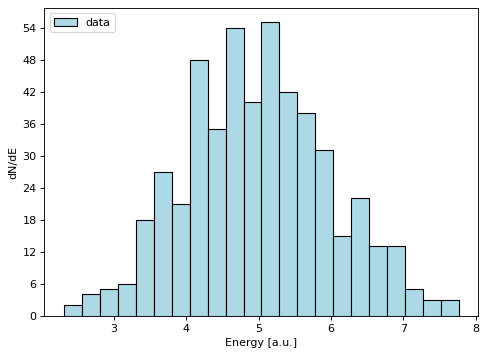

In [55]:
N = 500
mean, std = [5, 1]
x = np.random.normal(loc=mean, scale=std, size=N)
fig = plt.figure(figsize=(7,5), dpi=80)
binning = int(np.sqrt(N))
n, bins, _ = plt.hist(x, bins=binning, facecolor='lightblue', edgecolor='black', label="data")
plt.legend(loc='upper left')
plt.xlabel('Energy [a.u.]')
plt.ylabel('dN/dE')
fig.axes[0].yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

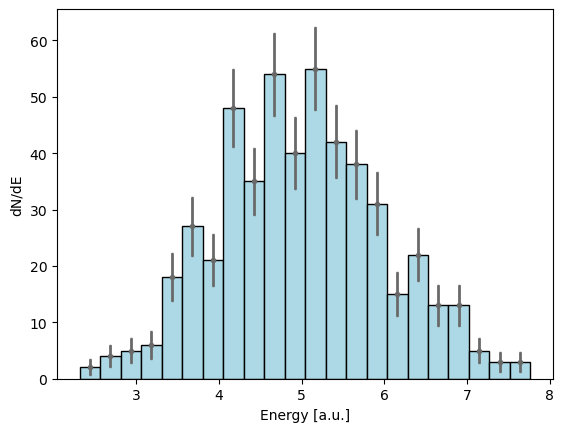

In [56]:
errors = np.sqrt(n)
pos = np.array([(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)])

plt.hist(x, bins=binning, facecolor='lightblue', edgecolor='black', label="data")
plt.errorbar( x=pos, y=n, yerr=errors, fmt='.', capsize=1, color='dimgrey', elinewidth=2)
plt.ylabel('Occurrencies with Poissonian errors')
plt.xlabel('Energy [a.u.]')
plt.ylabel('dN/dE')

plt.show()

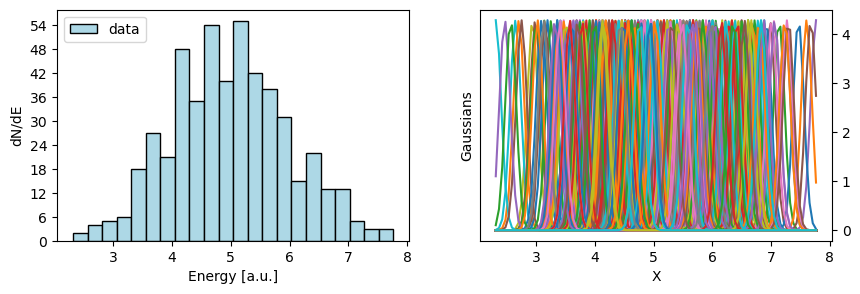

In [57]:
gauss = norm.stats(loc=x, scale=1.06*x.std()*x.size**(-1/5))

# Plot of all the gaussians
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ax1.hist(x, bins=binning, facecolor='lightblue', edgecolor='black', label="data")
ax1.legend(loc='upper left')
ax1.set_xlabel('Energy [a.u.]')
ax1.set_ylabel('dN/dE')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
x_ax = np.linspace(min(x), max(x), 100)
cumulative = np.zeros(x_ax.shape)
for i in range(len(gauss[0])):
    current_gauss = norm.pdf(x=x_ax, loc=gauss[0][i], scale=gauss[1][i])
    ax2.plot(x_ax, current_gauss)
    cumulative += current_gauss
ax2.set_xlabel('X')
ax2.set_ylabel('Gaussians')
ax2.yaxis.tick_right()

Histogram area 123.85226276785237
Gaussian areas 498.7139624375929


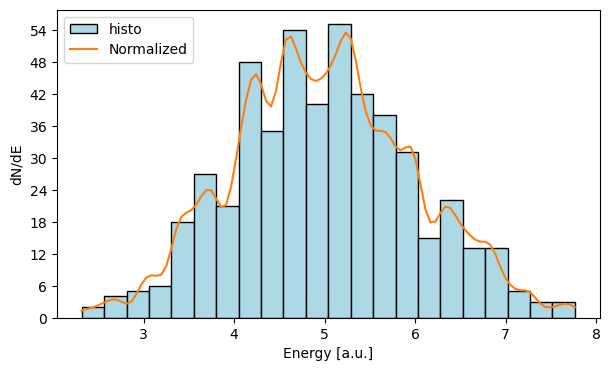

In [58]:
# area histo:
area_histo = sum(np.diff(bins)*n)
print("Histogram area", area_histo)
area_gaussians = integrate.trapz(cumulative, x_ax)
print("Gaussian areas", area_gaussians)
fig, ax1 = plt.subplots(figsize=(7, 4))
ax1.hist(x, bins=binning, facecolor='lightblue', edgecolor='black', label="histo")
ax1.set_xlabel('Energy [a.u.]')
ax1.set_ylabel('dN/dE')
ax1.plot(x_ax, cumulative*area_histo/area_gaussians, label='Normalized')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.legend(loc='upper left');

2. Color-coded scatter plot

Produce a scatter plot out of a dataset with two categories

Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
Display the dataset in a scatter plot marking the two categories with different marker colors.
An example is given below

You can try to make the procedure more general by allowing a given number 
 of categories

In [62]:
import pandas as pd
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
#from IPython.display import Image
#Image('two_categories_scatter_plot.png')

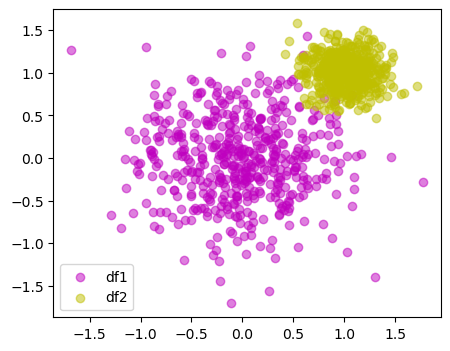

In [65]:
def make2Darray_normal(mean, std, length = 500):
    df = pd.DataFrame(np.random.normal(loc=mean, scale=std, size=(length, 2)), columns=['feature_1', 'feature_2'])
    return df
df1 = make2Darray_normal(0, 0.5)
df2 = make2Darray_normal(1, 0.2)

fig, ax1 = plt.subplots(figsize=(5, 4))
# ax1.set_xlabel('x')
# ax1.set_ylabel('Occurrencies')
ax1.scatter(df1['feature_1'], df1['feature_2'], label='df1', alpha=0.5, c='m')
ax1.scatter(df2['feature_1'], df2['feature_2'], label='df2', alpha=0.5, c='y')
ax1.legend(loc='lower left');

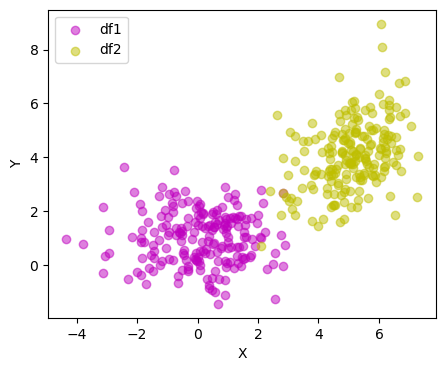

In [5]:
mean = [[0, 1], [5, 4]]
cov = [[[2, 0],[0,1]],[[1, 0.5], [0.5, 1.5]]]
x1, y1 = np.random.multivariate_normal(mean[0], cov[0], 200).T
x2, y2 = np.random.multivariate_normal(mean[1], cov[1], 200).T
fig, ax1 = plt.subplots(figsize=(5, 4))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.scatter(x1, y1, label='df1', alpha=0.5, c='m')
ax1.scatter(x2, y2, label='df2', alpha=0.5, c='y')
ax1.legend(loc='upper left');

3. Profile plot

Produce a profile plot from a scatter plot.

Download the following dataset and load it as a pandas dataframe:
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Note that you should use the np.load() function to load the file as a numpy array, call the .item() method, and then pass it to the pd.DataFrame() constructor.

Inspect the dataset, you'll find two variables (features)
Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
perform a linear regression of "residuals" versus "distances" using scipy.stats.linregress()
plot a seaborn jointplot of "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
Fill 3 numpy arrays
x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
y, the mean values of the "residuals", estimated in slices (bins) of "distance"
erry, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
Plot the profile plot on top of the scatter plot


In [70]:
data = np.load(file='residuals_261.npy', allow_pickle=True).item()
df = pd.DataFrame(data=data)
df = df[abs(df['residuals']) < 2]
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [71]:
result = linregress(df['distances'], df['residuals'])
result

LinregressResult(slope=0.003259770122030576, intercept=-0.15432816763069465, rvalue=0.04340351052255905, pvalue=8.71703718357661e-06, stderr=0.0007327014008445781, intercept_stderr=0.008458951961471829)

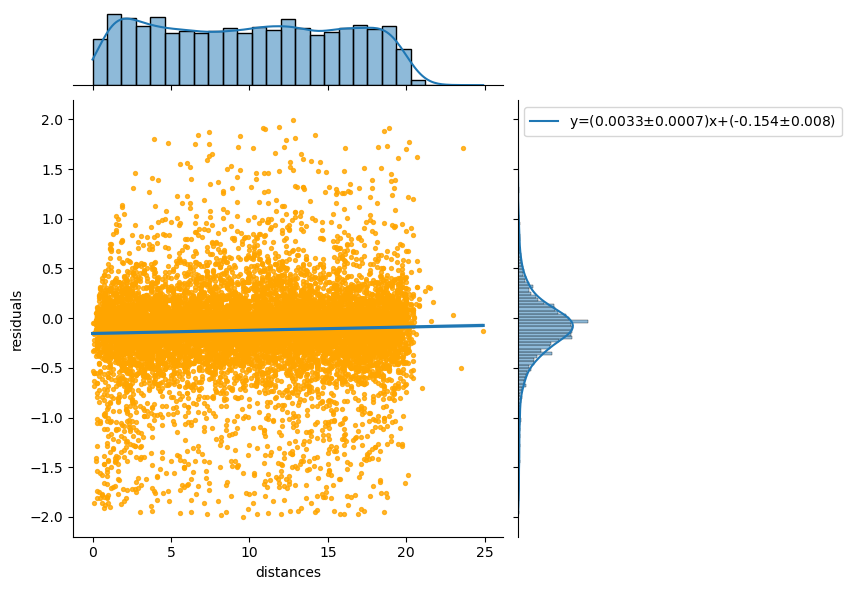

In [85]:
sns.jointplot(x="distances", y="residuals", data=df, kind='reg', scatter_kws={"color": "orange", "s": 8})
ax = plt.gca()
ax.legend(labels=[f'y=({round(result.slope,4)}$\pm${round(result.stderr,4)})x+({round(result.intercept,3)}$\pm${round(result.intercept_stderr, 3)})'])

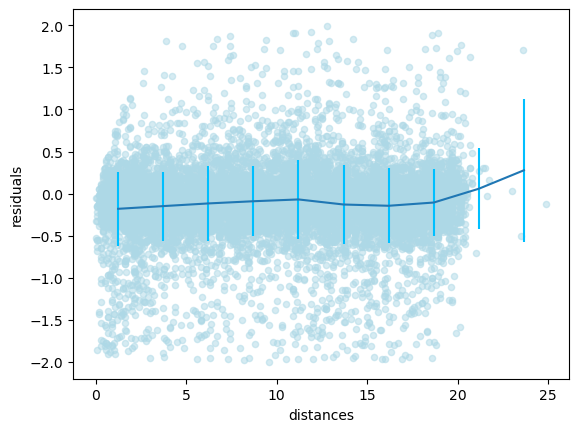

In [86]:
n, bins = np.histogram(df['distances'])
x = (bins[1:]+bins[:-1])*.5
y, _, _ = binned_statistic(x=df['distances'], values=df['residuals'], statistic='mean', bins=bins)
erry, _, _ = binned_statistic(x=df['distances'], values=df['residuals'], statistic='std', bins=bins)

df.plot.scatter(x='distances', y='residuals', c='Lightblue', alpha=0.5)
plt.errorbar(x, y, yerr=erry, ecolor='deepskyblue');